***
### Import required Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Import the necessary libraries for SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# train test 
from sklearn.model_selection import train_test_split

#Import for KNN
from sklearn.neighbors import KNeighborsClassifier

# for  Feature scaling
from sklearn.preprocessing import StandardScaler

# for ROC curve
from sklearn.metrics import roc_curve, auc

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# set the max columns to 55 
pd.set_option('display.max_columns',55)

### Load the Data into Pandas

In [3]:
# Load churn dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D209\churn_clean.csv"
 
df_churn = pd.read_csv(path, index_col=1) 
df_churn.head()   

# Drop the variables which are not needed to answer the research question. 

df_churn.drop(columns=['CaseOrder', 'Lat','Lng', 'Interaction', 'UID', 'City', 'State', 'Zip', 
                       'Population', 'Job','Techie', 'Port_modem', 'Tablet', 'Marital',
                       'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'PaymentMethod','Email','Item1', 'Item2', 'Item3', 'Item4',    
                       'Item5', 'Item6', 'Item7', 'Item8', 'County', 'Area', 'TimeZone'],inplace=True)

# check for null 
print("Check for Nulls")
print("-"*100)
print(df_churn.isnull().any())

print("*"*100, '\n')


# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_churn.isna().any())

print("*"*100)
print("Dataframe Information :", '\n')
print(df_churn.info())

Check for Nulls
----------------------------------------------------------------------------------------------------
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Contacts                False
Yearly_equip_failure    False
Contract                False
InternetService         False
Multiple                False
PaperlessBilling        False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool
**************************************************************************************************** 

Check for Missing Values
----------------------------------------------------------------------------------------------------
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Contacts    

In [4]:
# copy the dataframe before making any changes for regression
df_churn_origional = df_churn
df_churn_origional.head()

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Contract,InternetService,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
Customer_id,,,,,,,,,,,,,,,
K409198,0,68,28561.99,Male,No,7.978323,0,1,One year,Fiber Optic,No,Yes,6.795513,172.455519,904.536110
S120509,1,27,21704.77,Female,Yes,11.699080,0,1,Month-to-month,Fiber Optic,Yes,Yes,1.156681,242.632554,800.982766
K191035,4,50,9609.57,Female,No,10.752800,0,1,Two Year,DSL,Yes,Yes,15.754144,159.947583,2054.706961
D90850,1,48,18925.23,Male,No,14.913540,2,0,Two Year,DSL,No,Yes,17.087227,119.956840,2164.579412
K662701,0,83,40074.19,Male,Yes,8.147417,2,1,Month-to-month,Fiber Optic,No,No,1.670972,149.948316,271.493436


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, K409198 to T38070
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Gender                10000 non-null  object 
 4   Churn                 10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Contacts              10000 non-null  int64  
 7   Yearly_equip_failure  10000 non-null  int64  
 8   Contract              10000 non-null  object 
 9   InternetService       10000 non-null  object 
 10  Multiple              10000 non-null  object 
 11  PaperlessBilling      10000 non-null  object 
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(5), in

In [6]:
# get the summary
desc_df = df_churn.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.087700,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.147200,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.000000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.000000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.000000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.000000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530
+3_std,8.529301,115.175045,124406.676876,18.929906,3.959597,2.305860,113.855376,301.454099,9948.226107
-3_std,-4.353901,-9.018245,-44792.823334,1.073791,-1.971197,-1.509860,-44.803000,43.795534,-3163.543008


## Wrangle the data
- Contract
- InternetService
- Multiple
- PaperlessBilling
- Churn


References - https://pbpython.com/categorical-encoding.html


In [7]:
# Unique values for each categorical variable

print('-'*100)
print('Churn=', df_churn['Churn'].unique(), '\n')
print('Contract=', df_churn['Contract'].unique(), '\n')
print('InternetService=', df_churn['InternetService'].unique(), '\n')
print('Multiple=', df_churn['Multiple'].unique(), '\n')
print('PaperlessBilling=', df_churn['PaperlessBilling'].unique(), '\n')
print('Gender=', df_churn['Gender'].unique(), '\n')
print('-'*100)

----------------------------------------------------------------------------------------------------
Churn= ['No' 'Yes'] 

Contract= ['One year' 'Month-to-month' 'Two Year'] 

InternetService= ['Fiber Optic' 'DSL' 'None'] 

Multiple= ['No' 'Yes'] 

PaperlessBilling= ['Yes' 'No'] 

Gender= ['Male' 'Female' 'Nonbinary'] 

----------------------------------------------------------------------------------------------------


#### Churn, Multiple and PaperlessBilling

In [8]:
# Label encoding for Churn, multiple and PaperlessBilling variables 

cust_map = {"No": 0, "Yes": 1}         # Defining the mapping 

df_churn['Churn'] = df_churn['Churn'].map(cust_map)
df_churn['Multiple'] = df_churn['Multiple'].map(cust_map)
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map(cust_map)
df_churn.head()

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Contract,InternetService,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
Customer_id,,,,,,,,,,,,,,,
K409198,0,68,28561.99,Male,0,7.978323,0,1,One year,Fiber Optic,0,1,6.795513,172.455519,904.536110
S120509,1,27,21704.77,Female,1,11.699080,0,1,Month-to-month,Fiber Optic,1,1,1.156681,242.632554,800.982766
K191035,4,50,9609.57,Female,0,10.752800,0,1,Two Year,DSL,1,1,15.754144,159.947583,2054.706961
D90850,1,48,18925.23,Male,0,14.913540,2,0,Two Year,DSL,0,1,17.087227,119.956840,2164.579412
K662701,0,83,40074.19,Male,1,8.147417,2,1,Month-to-month,Fiber Optic,0,0,1.670972,149.948316,271.493436


#### Dummy values for - InternetService, Contract and Gender

References - https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [9]:
# Perform one-hot encoding
df_churn = pd.get_dummies(df_churn, columns=['InternetService', 'Contract', 'Gender'])

# Print the encoded DataFrame
df_churn.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Contract_Month-to-month,Contract_One year,Contract_Two Year,Gender_Female,Gender_Male,Gender_Nonbinary
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,0,68,28561.99,0,7.978323,0,1,0,1,6.795513,172.455519,904.536110,0,1,0,0,1,0,0,1,0
S120509,1,27,21704.77,1,11.699080,0,1,1,1,1.156681,242.632554,800.982766,0,1,0,1,0,0,1,0,0
K191035,4,50,9609.57,0,10.752800,0,1,1,1,15.754144,159.947583,2054.706961,1,0,0,0,0,1,1,0,0
D90850,1,48,18925.23,0,14.913540,2,0,0,1,17.087227,119.956840,2164.579412,1,0,0,0,0,1,0,1,0
K662701,0,83,40074.19,1,8.147417,2,1,0,0,1.670972,149.948316,271.493436,0,1,0,1,0,0,0,1,0


In [10]:
df_churn.dtypes

Children                         int64
Age                              int64
Income                         float64
Churn                            int64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
InternetService_DSL              uint8
InternetService_Fiber Optic      uint8
InternetService_None             uint8
Contract_Month-to-month          uint8
Contract_One year                uint8
Contract_Two Year                uint8
Gender_Female                    uint8
Gender_Male                      uint8
Gender_Nonbinary                 uint8
dtype: object

#### Convert uint8 to int format 

To convert multiple columns of uint8 values to int values in a Pandas DataFrame we can use applymap() method to apply the astype() function to each element in the DataFrame. 

In [11]:
# convert uint8 columns to int
df_churn = df_churn.applymap(lambda x: int(x) if isinstance(x, int) else x)
print(df_churn.dtypes)

Children                         int64
Age                              int64
Income                         float64
Churn                            int64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
InternetService_DSL              int64
InternetService_Fiber Optic      int64
InternetService_None             int64
Contract_Month-to-month          int64
Contract_One year                int64
Contract_Two Year                int64
Gender_Female                    int64
Gender_Male                      int64
Gender_Nonbinary                 int64
dtype: object


### SelectKBest - feature selection technique

- select the top K features from a dataset based on statistical tests

Reference - https://www.kaggle.com/code/jepsds/feature-selection-using-selectkbest/notebook

In [12]:
#Create your feature matrix X and target vector y
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

In [13]:
# Apply SelectKBest to the feature matrix:

k = 10   # number of top features to select  
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)
X_new = selector.transform(X)

In [14]:
#Get the indices of the top K features
top_k_indices = selector.get_support(indices=True)

In [15]:
#Get the names of the top K features
top_k_features = X.columns[top_k_indices]
top_k_features

Index(['Income', 'Multiple', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year'],
      dtype='object')

In [16]:
#Filter the original dataframe to include only the selected features:

X_selected = df_churn[top_k_features]
df_churn_selected = pd.concat([X_selected, y.to_frame()], axis=1)
df_churn_selected.head()

,Income,Multiple,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic,Contract_Month-to-month,Contract_One year,Contract_Two Year,Churn
Customer_id,,,,,,,,,,,
K409198,28561.99,0,6.795513,172.455519,904.536110,0,1,0,1,0,0
S120509,21704.77,1,1.156681,242.632554,800.982766,0,1,1,0,0,1
K191035,9609.57,1,15.754144,159.947583,2054.706961,1,0,0,0,1,0
D90850,18925.23,0,17.087227,119.956840,2164.579412,1,0,0,0,1,0
K662701,40074.19,0,1.670972,149.948316,271.493436,0,1,1,0,0,1


In [17]:
type(df_churn_selected)

pandas.core.frame.DataFrame

In [18]:
df_churn_selected.shape

(10000, 11)

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Reference - 

https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/

In the below code , I first select the continuous variables in the dataset and store them in a separate DataFrame called X_continuous. Then used StandardScaler to scale the values in this DataFrame and store the scaled values in a new DataFrame called X_scaled. Finally, replaced the original continuous variables in the original DataFrame with the scaled values using the pd.DataFrame.loc method.

In [19]:
df_churn_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, K409198 to T38070
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       10000 non-null  float64
 1   Multiple                     10000 non-null  int64  
 2   Tenure                       10000 non-null  float64
 3   MonthlyCharge                10000 non-null  float64
 4   Bandwidth_GB_Year            10000 non-null  float64
 5   InternetService_DSL          10000 non-null  int64  
 6   InternetService_Fiber Optic  10000 non-null  int64  
 7   Contract_Month-to-month      10000 non-null  int64  
 8   Contract_One year            10000 non-null  int64  
 9   Contract_Two Year            10000 non-null  int64  
 10  Churn                        10000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 937.5+ KB


In [20]:
# Select the continuous variables in the dataset
continuous_vars = ['Income','Tenure','MonthlyCharge','Bandwidth_GB_Year']
X_continuous = df_churn_selected[continuous_vars]

In [21]:
# Scale the continuous variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)
X_scaled

array([[-0.39877774, -1.04874621, -0.00394256, -1.13848703],
       [-0.64195445, -1.26200116,  1.6303259 , -1.18587584],
       [-1.07088496, -0.7099398 , -0.29522482, -0.61213775],
       ...,
       [ 0.21903654,  0.48751337, -0.06172934,  0.35098358],
       [-0.82058767,  1.38301834,  1.86300465,  1.40771348],
       [-1.09176018,  1.09012007,  1.04467151,  1.12816258]])

In [22]:
# Replace the original continuous variables with the scaled values
df_churn_selected.loc[:, continuous_vars] = X_scaled

In [23]:
df_churn_selected.head()

,Income,Multiple,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic,Contract_Month-to-month,Contract_One year,Contract_Two Year,Churn
Customer_id,,,,,,,,,,,
K409198,-0.398778,0,-1.048746,-0.003943,-1.138487,0,1,0,1,0,0
S120509,-0.641954,1,-1.262001,1.630326,-1.185876,0,1,1,0,0,1
K191035,-1.070885,1,-0.709940,-0.295225,-0.612138,1,0,0,0,1,0
D90850,-0.740525,0,-0.659524,-1.226521,-0.561857,1,0,0,0,1,0
K662701,0.009478,0,-1.242551,-0.528086,-1.428184,0,1,1,0,0,1


### Prepared Dataset

Reference - https://www.geeksforgeeks.org/working-csv-files-python/

In [24]:
# Extract the clean data in CSV format 
df_churn_selected.to_csv('Churn_prepared.csv')

#### Pair Plot

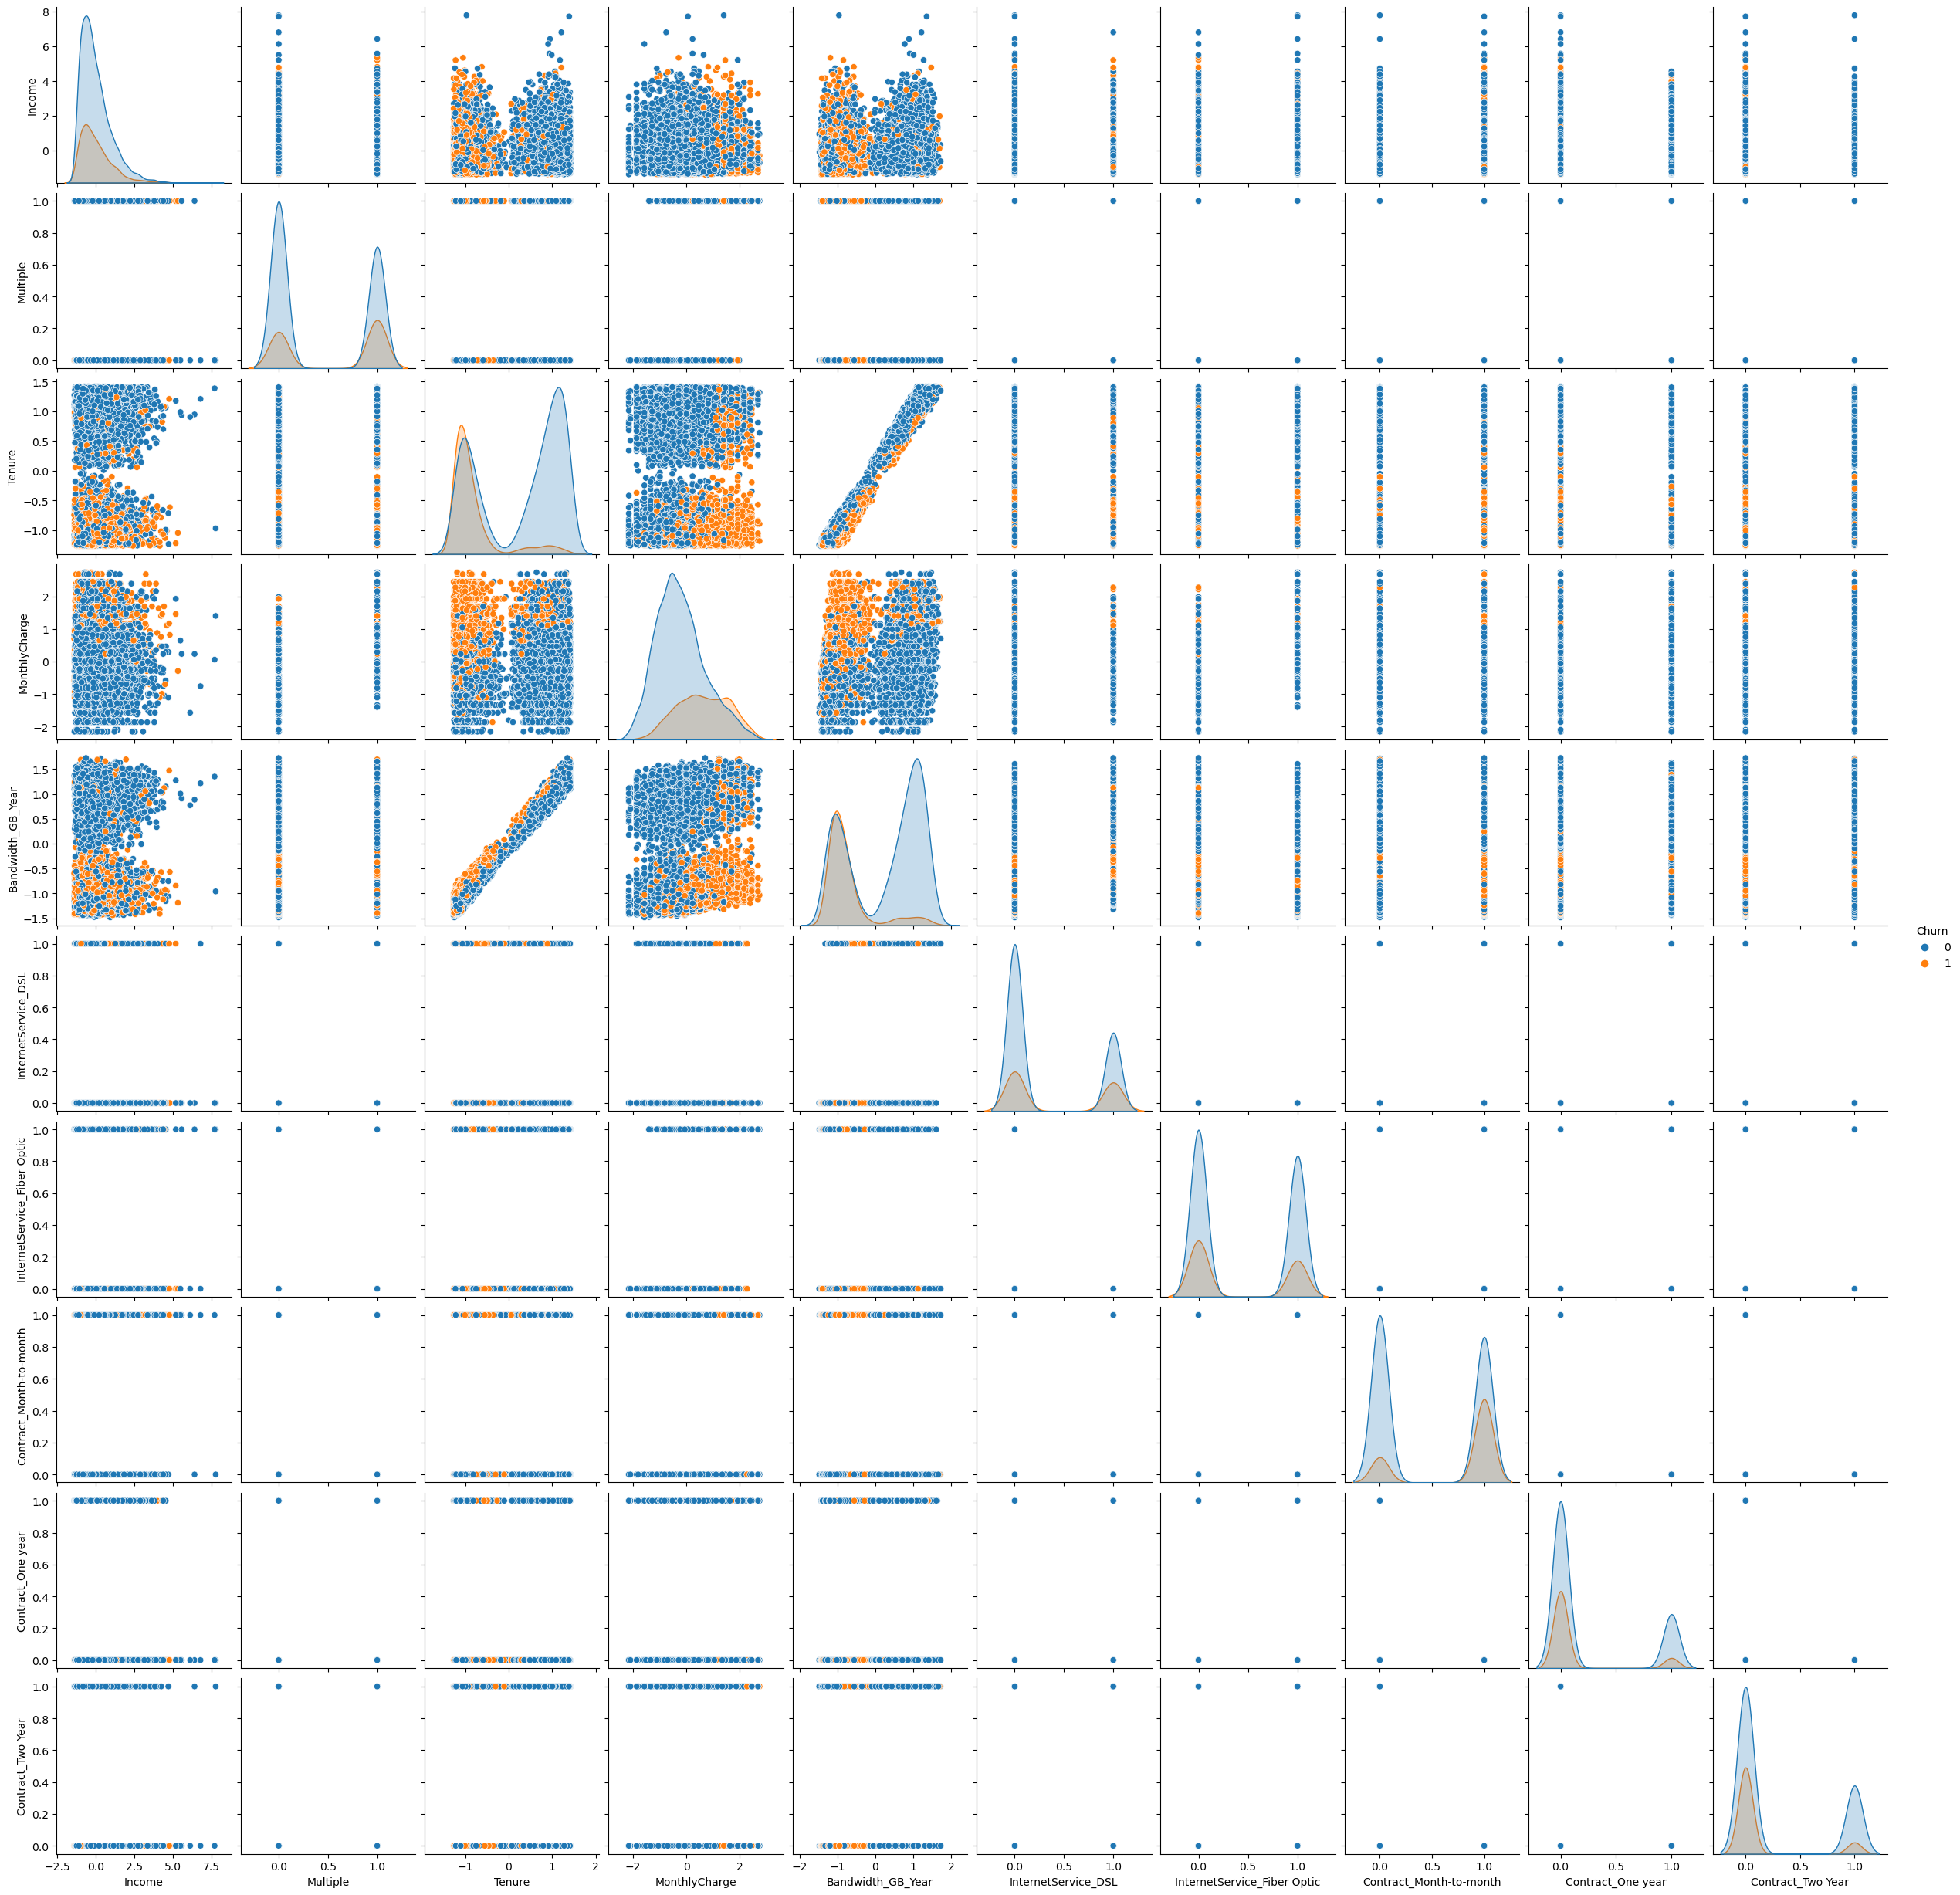

In [25]:
sns.pairplot(df_churn_selected,hue='Churn')

#### Train Test Split

In [26]:
# Define the dependent variable (y) and independent variables (X)
y = df_churn_selected['Churn']
X = df_churn_selected.drop(columns=['Churn'])      

print(y.head())
print('*'*100)
print(X.head())

Customer_id
K409198    0
S120509    1
K191035    0
D90850     0
K662701    1
Name: Churn, dtype: int64
****************************************************************************************************
               Income  Multiple    Tenure  MonthlyCharge  Bandwidth_GB_Year  \
Customer_id                                                                   
K409198     -0.398778         0 -1.048746      -0.003943          -1.138487   
S120509     -0.641954         1 -1.262001       1.630326          -1.185876   
K191035     -1.070885         1 -0.709940      -0.295225          -0.612138   
D90850      -0.740525         0 -0.659524      -1.226521          -0.561857   
K662701      0.009478         0 -1.242551      -0.528086          -1.428184   

             InternetService_DSL  InternetService_Fiber Optic  \
Customer_id                                                     
K409198                        0                            1   
S120509                        0               

In [27]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [28]:
X_train

,Income,Multiple,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic,Contract_Month-to-month,Contract_One year,Contract_Two Year
Customer_id,,,,,,,,,,
I116479,-1.271740,1,1.217679,1.164571,1.399428,1,0,1,0,0
V52316,0.427591,0,0.806654,0.814714,0.738392,0,1,0,1,0
C152580,-1.111589,1,-0.900177,1.105939,-0.667293,1,0,1,0,0
D189112,-0.855133,0,1.364257,0.349722,1.420681,0,0,0,0,1
F240900,-0.562087,0,-1.101971,0.228737,-1.202689,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
Z842961,1.688057,1,1.302961,0.462162,1.143086,0,1,0,1,0
I590530,0.551747,0,-0.866419,-1.343098,-0.886956,1,0,1,0,0
Q14524,-0.042981,1,-0.822060,2.213269,-0.757666,0,1,0,0,1


In [29]:
X_test

,Income,Multiple,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic,Contract_Month-to-month,Contract_One year,Contract_Two Year
Customer_id,,,,,,,,,,
Z710444,0.236969,0,1.087750,0.578999,0.996608,0,1,1,0,0
N843105,-0.222124,1,-1.127655,-0.644237,-1.302937,0,1,0,0,1
Z365104,-1.185489,0,-1.097948,0.640589,-0.896683,1,0,0,1,0
W959493,0.489537,0,1.299247,0.287369,1.327949,0,1,1,0,0
P94424,-0.293371,1,-1.236337,1.165656,-1.076403,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
B586243,-0.895758,1,-1.215325,-1.109993,-1.293658,1,0,0,0,1
B269098,0.194375,1,-0.843172,-0.061892,-0.914893,0,0,0,0,1
W25766,-1.060531,1,1.311185,-0.003782,1.183315,0,1,1,0,0


In [30]:
print('X_train length =', len(X_train))
print('X_test length =', len(X_test), '\n')

X_train length = 8000
X_test length = 2000 



In [31]:
# Extract the training and testing data in CSV format 
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

### Data summary and Implications 

Reference - https://www.youtube.com/watch?v=wTF6vzS9fy4&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=62

#### Using KNN start with k=1

In [32]:
# Initial KNN classification 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# Predict from model 
y_pred = knn.predict(X_test)

In [33]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Initial model Predictions and Evaluations

In [34]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print('K=1, Confustion Matrix=' ,'\n' , conf_mat)

K=1, Confustion Matrix= 
 [[1346  140]
 [ 144  370]]


In [35]:
# compute classification Matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1486
           1       0.73      0.72      0.72       514

    accuracy                           0.86      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.86      0.86      0.86      2000



In [36]:
# Accuracy on Train 
print("Accuracy @ K = 1")
print("Training Accuracy is :" , knn.score(X_train, y_train ))

# Accuracy on Test 
print("Testing Accuracy is :" , knn.score(X_test, y_test ))

Accuracy @ K = 1
Training Accuracy is : 1.0
Testing Accuracy is : 0.858


#### Sensitivity and Specificity

The sensitivity and specificity are additional performance metrics that can be calculated from the confusion matrix. 

- Sensitivity measures the proportion of actual positive cases that are correctly identified by the model.
- Specificity measures the proportion of actual negative cases that are correctly identified by the model.

In [37]:
# Calculate sensitivity and specificity
true_positives = conf_mat[1, 1]
false_positives = conf_mat[0, 1]
true_negatives = conf_mat[0, 0]
false_negatives = conf_mat[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Initial Sensitivity: {:.2f}".format(sensitivity))
print("Initial Specificity: {:.2f}".format(specificity))

Initial Sensitivity: 0.72
Initial Specificity: 0.91


####  ROC curve

Reference - 
https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

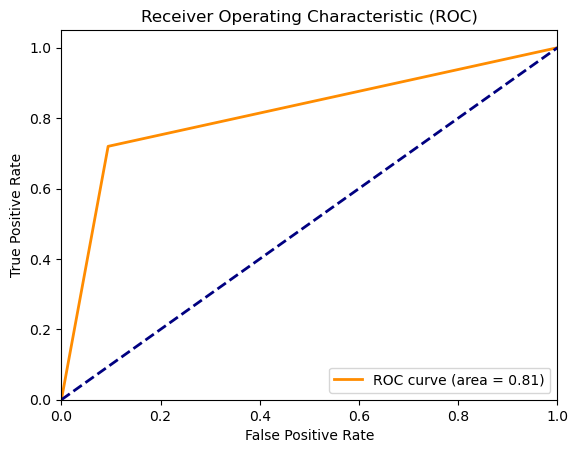

In [38]:
# Calculate the predicted probabilities
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Choosing a K Value

Use error plot or accuracy plot to find the most favorable K value.

Reference - https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [39]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.119 at K = 15


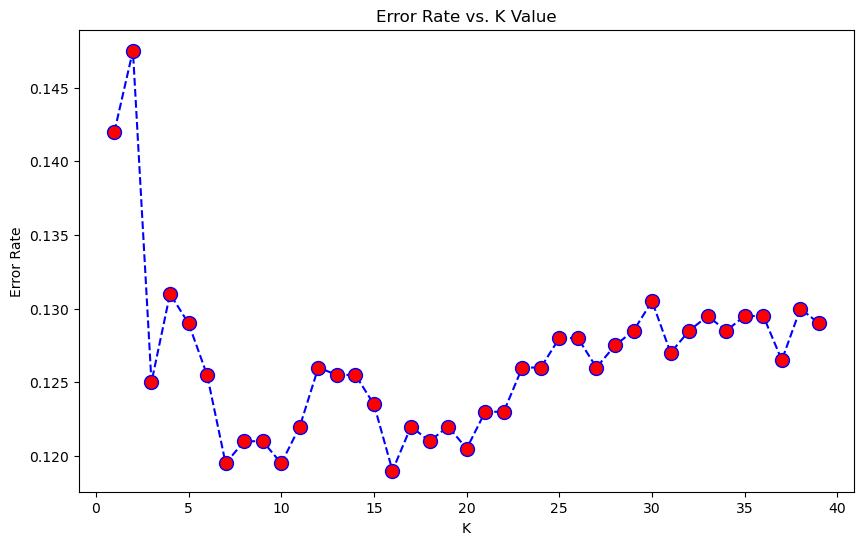

In [40]:
## Plot the error rate vs. K values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the plot, We can see that the smallest error we got is 0.119 at K=15. Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.881 at K = 15


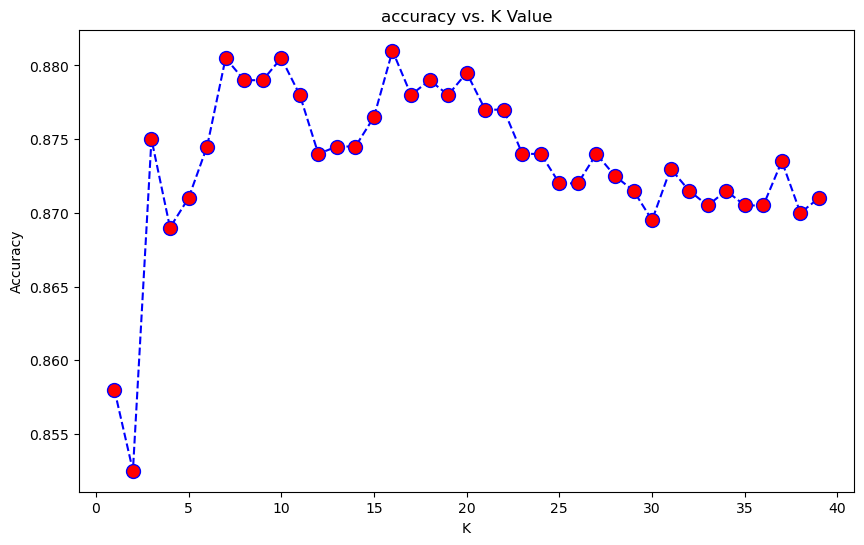

In [41]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### Build the model with new K Value 

In [42]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Confusion matrix

 [[1379  107]
 [ 140  374]]

True Positives(TP) =  1379

True Negatives(TN) =  374

False Positives(FP) =  107

False Negatives(FN) =  140


<AxesSubplot:>

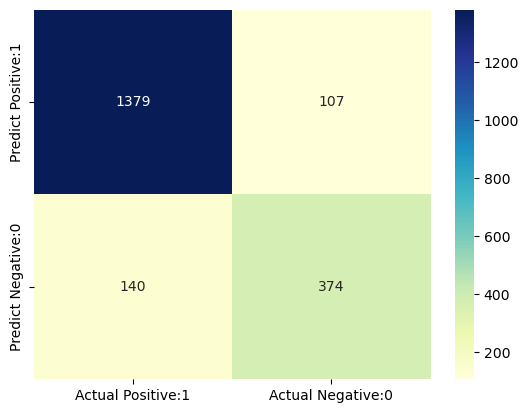

In [44]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
# compute classification Matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1486
           1       0.78      0.73      0.75       514

    accuracy                           0.88      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.87      0.88      0.88      2000



In [46]:
# Accuracy on Train 
print("Accuracy @ K = 15")
print("Training Accuracy is :" , knn.score(X_train, y_train ))

# Accuracy on Test 
print("Testing Accuracy is :" , knn.score(X_test, y_test ))

Accuracy @ K = 15
Training Accuracy is : 0.900625
Testing Accuracy is : 0.8765


The training-set accuracy score is 0.900625 while the test-set accuracy to be 0.87655. These two values are quite comparable. So, there is no sign of overfitting.

#### sensitivity and specificity

In [48]:
# Calculate sensitivity and specificity
true_positives = cm[1, 1]
false_positives = cm[0, 1]
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Final  Sensitivity: {:.2f}".format(sensitivity))
print("Final Specificity: {:.2f}".format(specificity))

Final  Sensitivity: 0.73
Final Specificity: 0.93


#### ROC Curve

- The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

Reference - 

https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

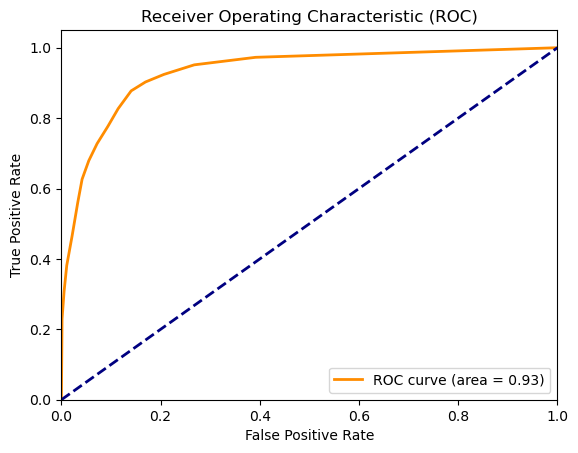

In [49]:
# Calculate the predicted probabilities
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Note :** In the above code I am using the filterwarnings function from the warnings module to suppress any warning that matches the FutureWarning category. This will silence the warning message for the entire program.